## Overview Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
from matplotlib import rcParams
import matplotlib

In [3]:
ped_data = pd.read_csv('../../data/pediatric_patients_report_drug_reaction.csv.gz',compression='gzip', index_col=0)

In [4]:
ped_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881396 entries, 1 to 1754669
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   patient_custom_master_age       881396 non-null  float64
 1   patient_custom_master_age_unit  881396 non-null  object 
 2   patient_onsetage                881396 non-null  float64
 3   patient_onsetageunit            881396 non-null  object 
 4   patient_sex                     881396 non-null  object 
 5   safetyreportid                  881396 non-null  object 
 6   nichd                           881396 non-null  object 
 7   ich_ema                         639944 non-null  object 
 8   fda                             529859 non-null  object 
 9   lastupdate_date                 881396 non-null  object 
 10  mostrecent_receive_date         881396 non-null  object 
 11  receive_date                    881396 non-null  object 
 12  congenital_anomali  

In [5]:
print(f"จำนวนข้อมูลทั้งหมด: {ped_data.shape[0]:,} แถว")

จำนวนข้อมูลทั้งหมด: 881,396 แถว


In [21]:
unique_safetyreportid = ped_data['safetyreportid'].nunique()
duplicate_safetyreportid = ped_data['safetyreportid'].duplicated().sum()


print(f'จำนวนรายงานที่ไม่มีการซ้ำกันคือ {unique_safetyreportid:,} รายงาน')
print(f'จำนวนรายงานที่มีการซ้ำกันคือ {duplicate_safetyreportid:,} รายงาน')
print(f'จำนวนรายงานทั้งหมดคือ {unique_safetyreportid + duplicate_safetyreportid:,} รายงาน จะเท่ากับข้อมูลต้นฉบับ {len(ped_data):,} รายงาน')

จำนวนรายงานที่ไม่มีการซ้ำกันคือ 113,665 รายงาน
จำนวนรายงานที่มีการซ้ำกันคือ 767,731 รายงาน
จำนวนรายงานทั้งหมดคือ 881,396 รายงาน จะเท่ากับข้อมูลต้นฉบับ 881,396 รายงาน


In [22]:
drug_unique = ped_data['medicinal_product'].nunique()
reaction_unique = ped_data['reaction_meddrapt'].nunique()
print(f'จำนวนยาที่ไม่ซ้ำกันทั้งหมด: {drug_unique:,} รายการ')
print(f'จำนวนอาการที่ไม่ซ้ำกันทั้งหมด: {reaction_unique:,} รายการ')

จำนวนยาที่ไม่ซ้ำกันทั้งหมด: 16,536 รายการ
จำนวนอาการที่ไม่ซ้ำกันทั้งหมด: 12,231 รายการ


In [23]:
# จำนวน reaction ที่แต่ละยาเกิดขึ้น
drug_reaction_count = ped_data.groupby('medicinal_product')['reaction_meddrapt'].nunique().reset_index()
drug_reaction_count.columns = ['medicinal_product', 'num_unique_reactions']
drug_reaction_count.sort_values(by='num_unique_reactions', ascending=False)

,medicinal_product,num_unique_reactions
9776,METHOTREXATE,2424
4405,CYCLOSPORINE,1949
4385,CYCLOPHOSPHAMIDE,1918
201,ACCUTANE,1741
12387,PREDNISOLONE,1684
...,...,...
14454,TAMSULOSIN DURA,1
14445,TALVOSILEN,1
14443,TALOXA ORAL SUSPENSION (FELBAMATE),1
14436,TALINOLOL,1


In [24]:
# จำนวน ยา ที่พบ reaction
drug_reaction_count = ped_data.groupby('reaction_meddrapt')['medicinal_product'].nunique().reset_index()
drug_reaction_count.columns = ['reaction_meddrapt', 'num_unique_drugs']
drug_reaction_count.sort_values(by='num_unique_drugs', ascending=False)

,reaction_meddrapt,num_unique_drugs
9326,PYREXIA,2575
12001,VOMITING,2561
2649,CONVULSION,2038
7744,NAUSEA,1820
3425,DRUG INEFFECTIVE,1727
...,...,...
8757,PHYSICAL PRODUCT LABEL ISSUE,1
20,ABDOMINAL OPERATION,1
1511,BONE ABSCESS,1
12223,YERSINIA INFECTION,1


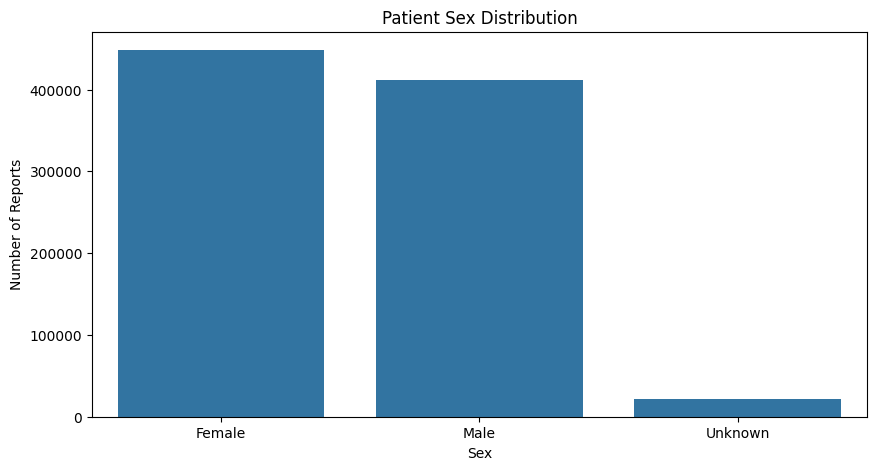

In [6]:
# 1.
plt.figure(figsize=(10, 5))
sns.countplot(x='patient_sex', data=ped_data, order=ped_data['patient_sex'].value_counts().index)
plt.title('Patient Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Number of Reports')
plt.show()



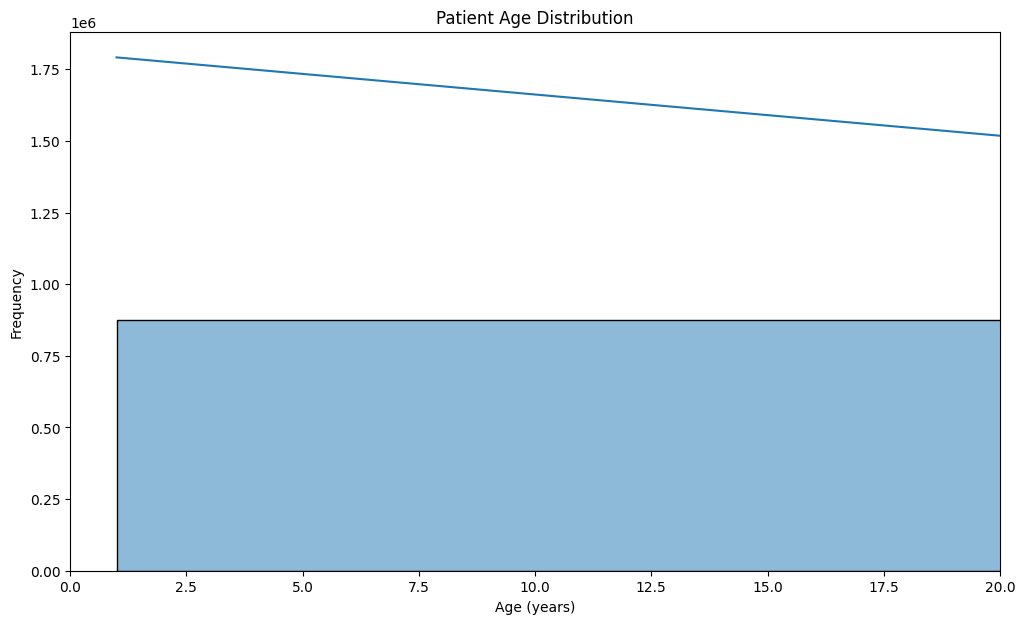

In [13]:
# --- การกระจายตัวของอายุ (Patient Age Distribution) ---
# ทำความสะอาดข้อมูลอายุที่เป็นค่าติดลบหรือสูงผิดปกติ (ถ้ามี)
age_cleaned = ped_data[ped_data['patient_onsetage'] >= 0]

plt.figure(figsize=(12, 7))
sns.histplot(age_cleaned['patient_onsetage'], bins=50, kde=True)
plt.title('Patient Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.xlim(0, 20)
plt.show()

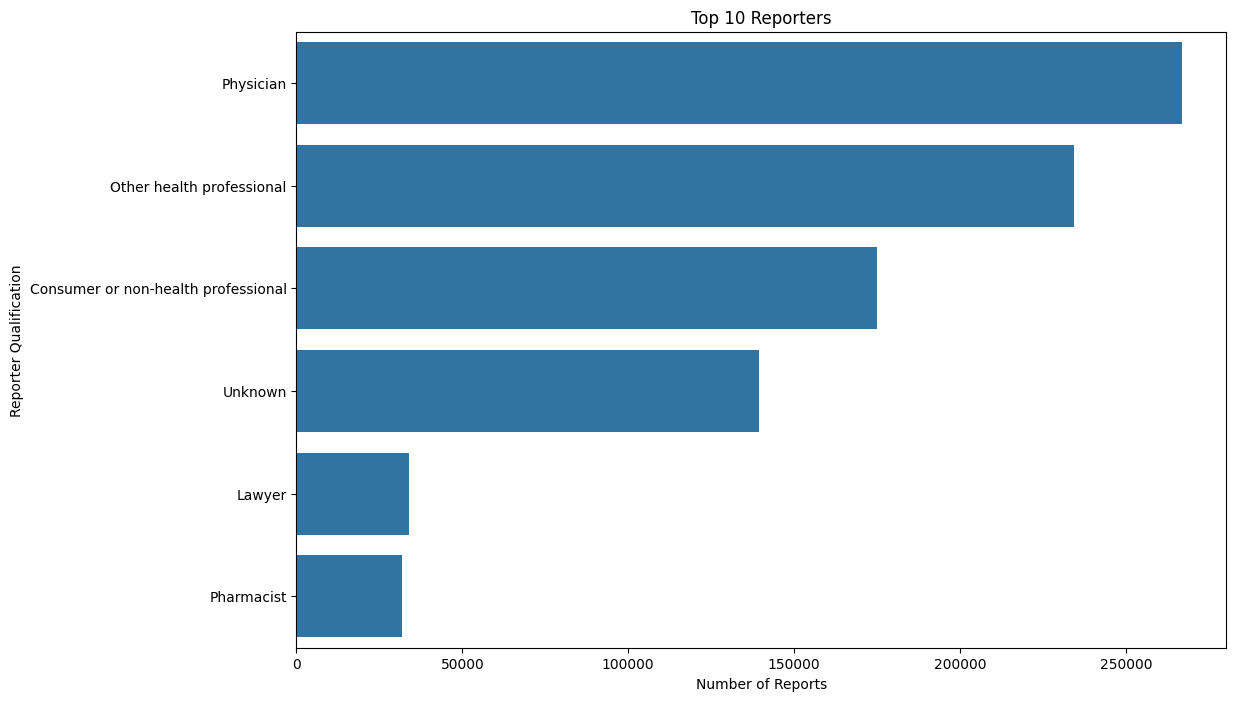

In [8]:
# 2.
plt.figure(figsize=(12, 8))
# เลือกมาแค่ 10 อันดับแรกเพื่อความชัดเจน
top_reporters = ped_data['reporter_qualification'].value_counts().nlargest(10)

sns.barplot(y=top_reporters.index, x=top_reporters.values, orient='h')
plt.title('Top 10 Reporters')
plt.xlabel('Number of Reports')
plt.ylabel('Reporter Qualification')
plt.show()

/tmp/ipykernel_21031/3949587227.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_drugs.index, x=top_drugs.values, orient='h', palette='viridis')


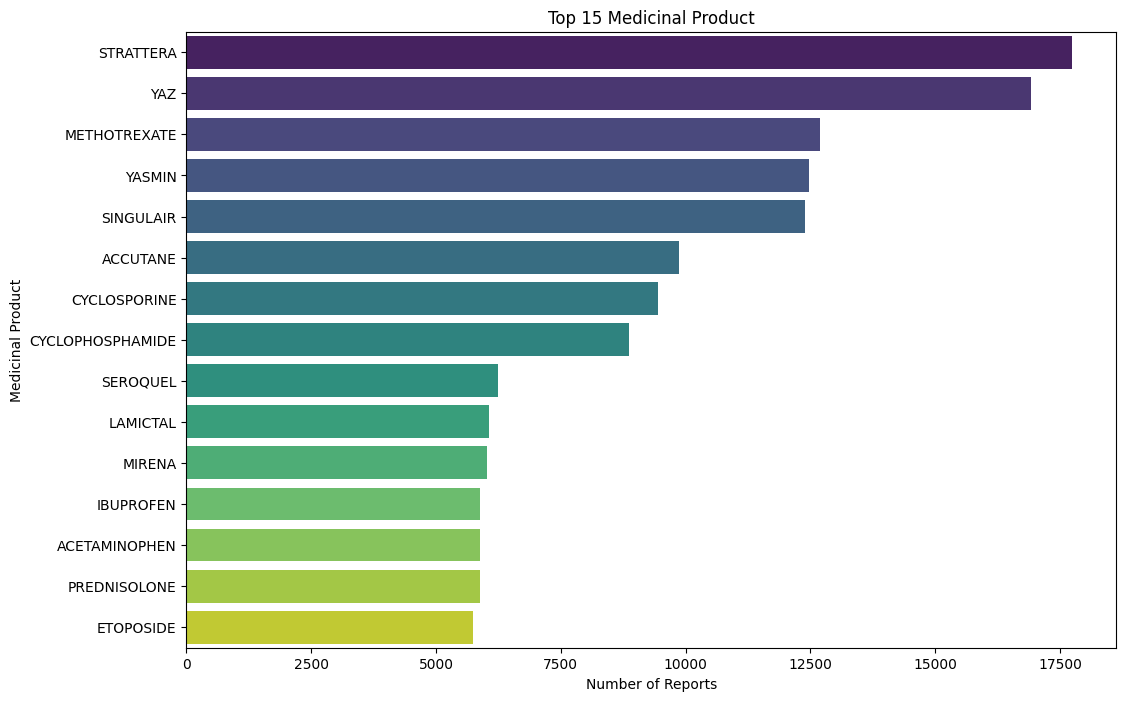

In [9]:
# 3. 15 อันดับยาที่ถูกรายงานบ่อยที่สุด
top_drugs = ped_data['medicinal_product'].value_counts().nlargest(15)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_drugs.index, x=top_drugs.values, orient='h', palette='viridis')
plt.title('Top 15 Medicinal Product')
plt.xlabel('Number of Reports')
plt.ylabel('Medicinal Product')
plt.show()

/tmp/ipykernel_21031/834007468.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_reaction.index, x=top_reaction.values, orient='h', palette='viridis')


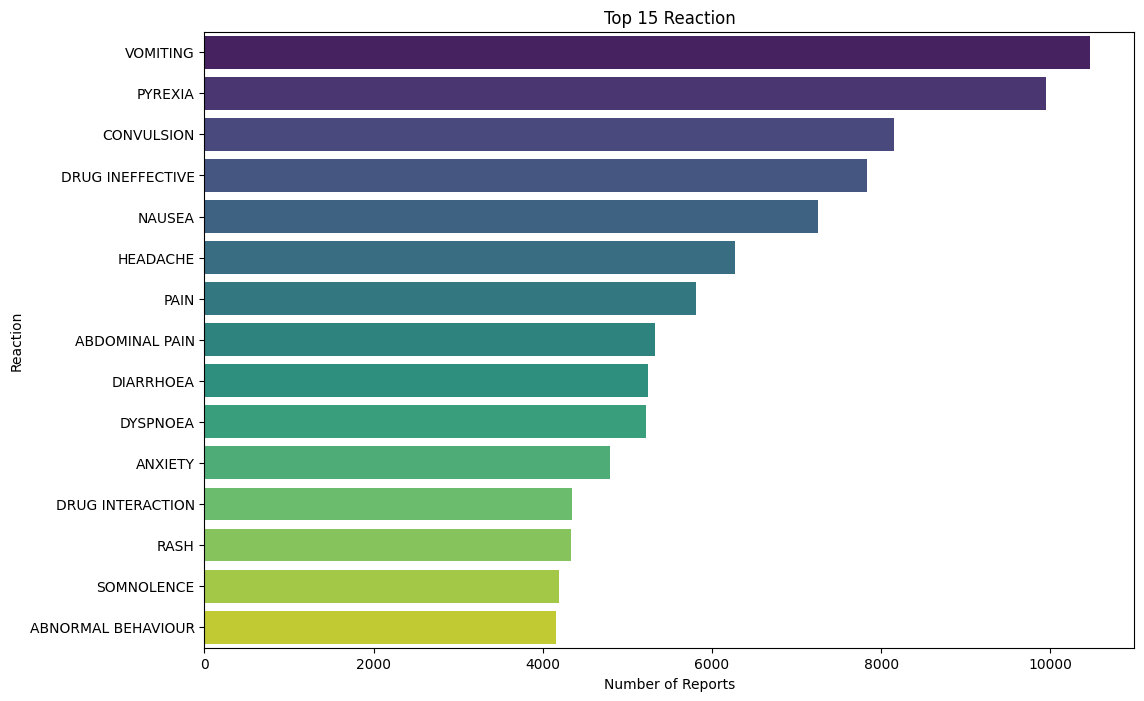

In [10]:
# 15 อันดับอาการไม่พึงประสงค์ที่พบบ่อยที่สุด

top_reaction = ped_data['reaction_meddrapt'].value_counts().nlargest(15)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_reaction.index, x=top_reaction.values, orient='h', palette='viridis')
plt.title('Top 15 Reaction')
plt.xlabel('Number of Reports')
plt.ylabel('Reaction')
plt.show()

/tmp/ipykernel_21031/2543282408.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_reactions_for_drug.index, x=top_reactions_for_drug.values, orient='h', palette='coolwarm')


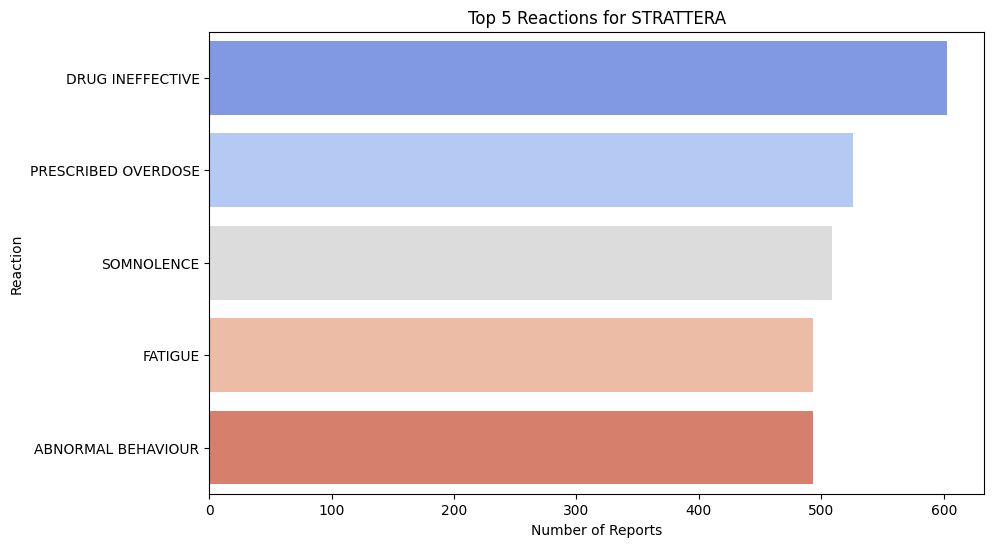

In [11]:
# Case study: อาการที่พบบ่อยที่สุดของยาอันดับ 1
# หายาที่ถูกรายงานบ่อยที่สุด

most_common_drug = top_drugs.index[0]

drug_specifig_df = ped_data[ped_data['medicinal_product'] == most_common_drug]

# หาอาการที่พบบ่อยที่สุด
top_reactions_for_drug = drug_specifig_df['reaction_meddrapt'].value_counts().nlargest(5)

plt.figure(figsize=(10,6))
sns.barplot(y=top_reactions_for_drug.index, x=top_reactions_for_drug.values, orient='h', palette='coolwarm')
plt.title(f'Top 5 Reactions for {most_common_drug}')
plt.xlabel('Number of Reports')
plt.ylabel('Reaction')
plt.show()

/tmp/ipykernel_21031/803972800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='nichd', data=ped_data, order=ped_data['nichd'].value_counts().index, palette='magma')


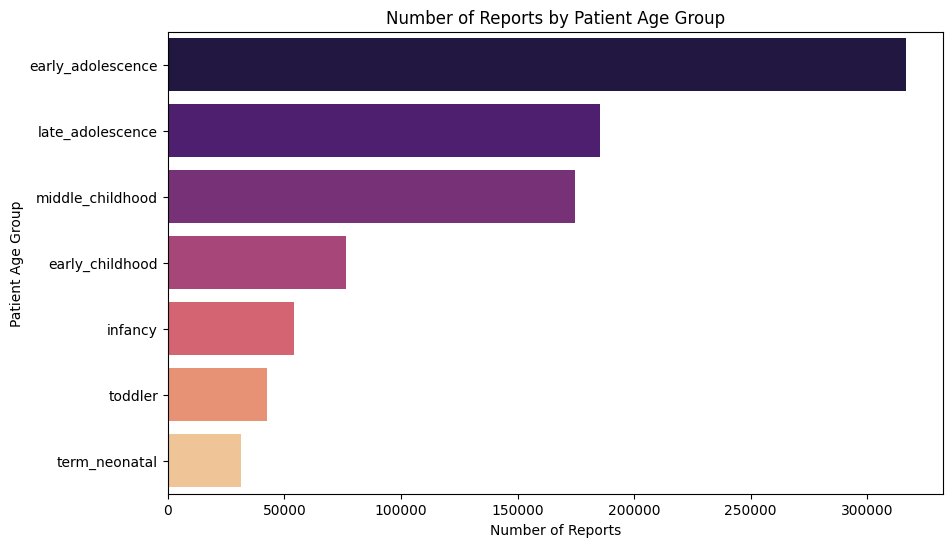

In [15]:
# --- การกระจายตัวของรายงานตามกลุ่มอายุ (Report Distribution by Age Group) ---
plt.figure(figsize=(10, 6))
sns.countplot(y='nichd', data=ped_data, order=ped_data['nichd'].value_counts().index, palette='magma')
plt.title('Number of Reports by Patient Age Group')
plt.xlabel('Number of Reports')
plt.ylabel('Patient Age Group')
plt.show()

/tmp/ipykernel_21031/3596752909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_drugs_early_adolescence.index, x=top_drugs_early_adolescence.values, orient='h', palette='viridis')


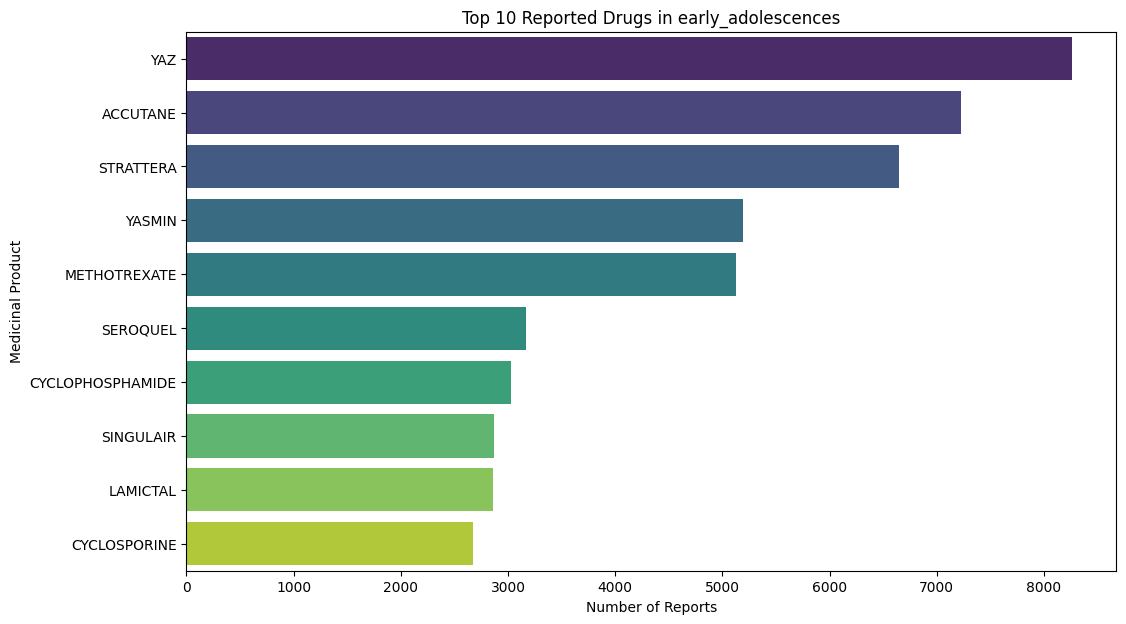

In [16]:
# --- เจาะลึก: 10 อันดับยาที่พบบ่อยในกลุ่ม 'early_adolescence' ---
early_adolescence_data = ped_data[ped_data['nichd'] == 'early_adolescence']
top_drugs_early_adolescence = early_adolescence_data['medicinal_product'].value_counts().nlargest(10)

plt.figure(figsize=(12, 7))
sns.barplot(y=top_drugs_early_adolescence.index, x=top_drugs_early_adolescence.values, orient='h', palette='viridis')
plt.title('Top 10 Reported Drugs in early_adolescences')
plt.xlabel('Number of Reports')
plt.ylabel('Medicinal Product')
plt.show()

/tmp/ipykernel_21031/1755951894.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='reaction_outcome', data=ped_data, order=ped_data['reaction_outcome'].value_counts().index, palette='Reds_r')


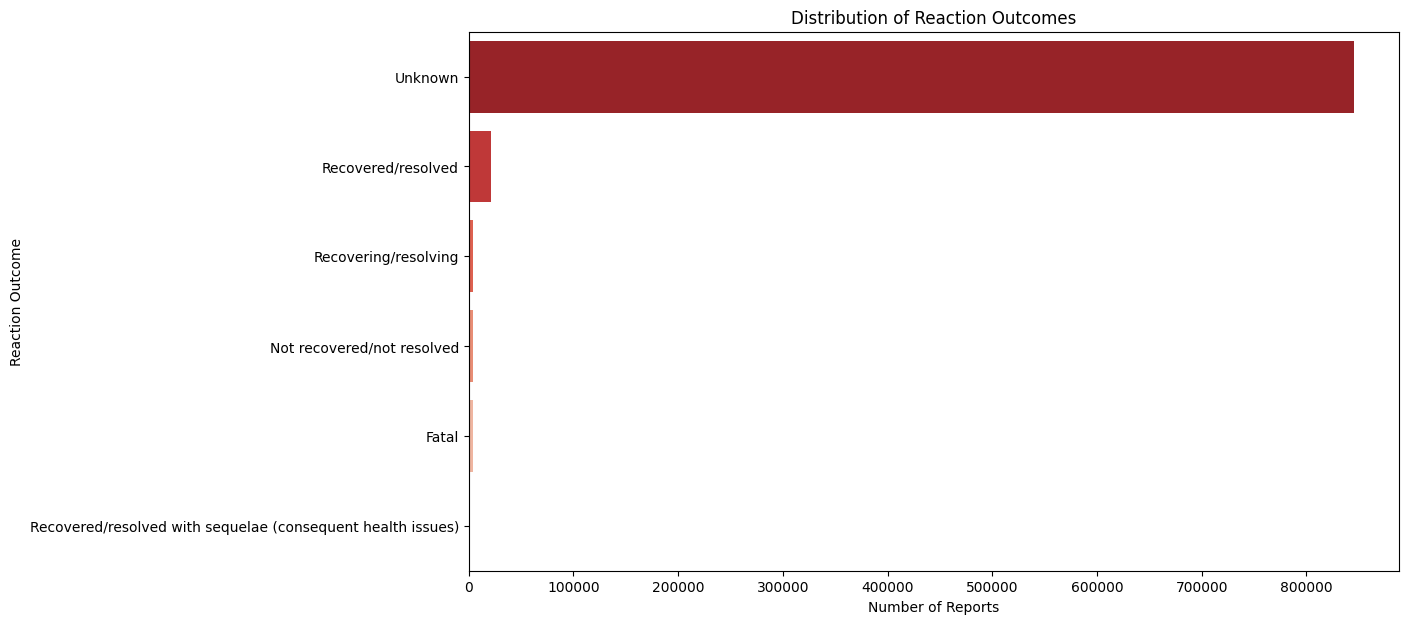

In [17]:
# --- การกระจายตัวของผลลัพธ์อาการ (Distribution of Reaction Outcomes) ---
plt.figure(figsize=(12, 7))
sns.countplot(y='reaction_outcome', data=ped_data, order=ped_data['reaction_outcome'].value_counts().index, palette='Reds_r')
plt.title('Distribution of Reaction Outcomes')
plt.xlabel('Number of Reports')
plt.ylabel('Reaction Outcome')
plt.show()

/tmp/ipykernel_21031/739275336.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_drugs_fatal.index, x=top_drugs_fatal.values, orient='h', palette='dark:salmon_r')


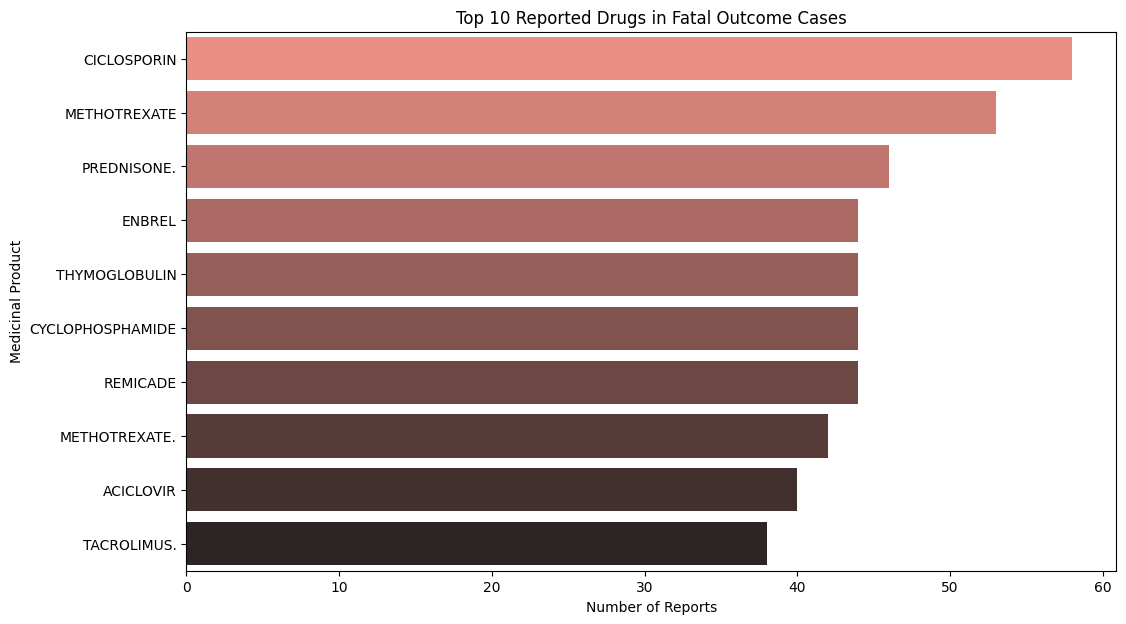

In [18]:
# --- เจาะลึก: 10 อันดับยาที่เกี่ยวข้องกับผลลัพธ์ 'Fatal' (เสียชีวิต) ---
fatal_outcomes = ped_data[ped_data['reaction_outcome'] == 'Fatal']
top_drugs_fatal = fatal_outcomes['medicinal_product'].value_counts().nlargest(10)

plt.figure(figsize=(12, 7))
sns.barplot(y=top_drugs_fatal.index, x=top_drugs_fatal.values, orient='h', palette='dark:salmon_r')
plt.title('Top 10 Reported Drugs in Fatal Outcome Cases')
plt.xlabel('Number of Reports')
plt.ylabel('Medicinal Product')
plt.show()

/tmp/ipykernel_21031/1302002612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='drug_characterization', data=ped_data, palette='crest')


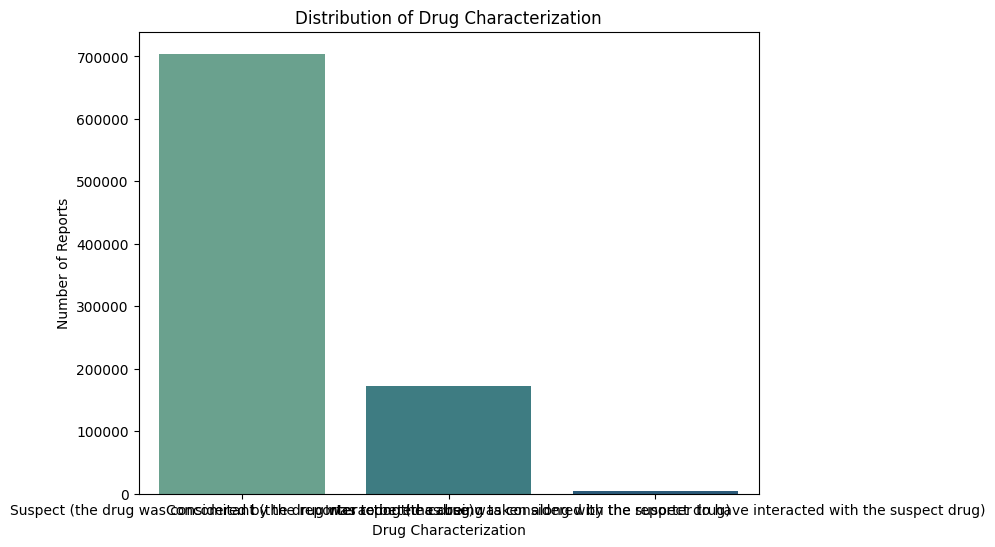

In [19]:
# --- บทบาทของยา (Drug Characterization) ---
plt.figure(figsize=(8, 6))
sns.countplot(x='drug_characterization', data=ped_data, palette='crest')
plt.title('Distribution of Drug Characterization')
plt.xlabel('Drug Characterization')
plt.ylabel('Number of Reports')
plt.show()

/tmp/ipykernel_21031/3716582425.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_routes.index, x=top_routes.values, orient='h', palette='flare')


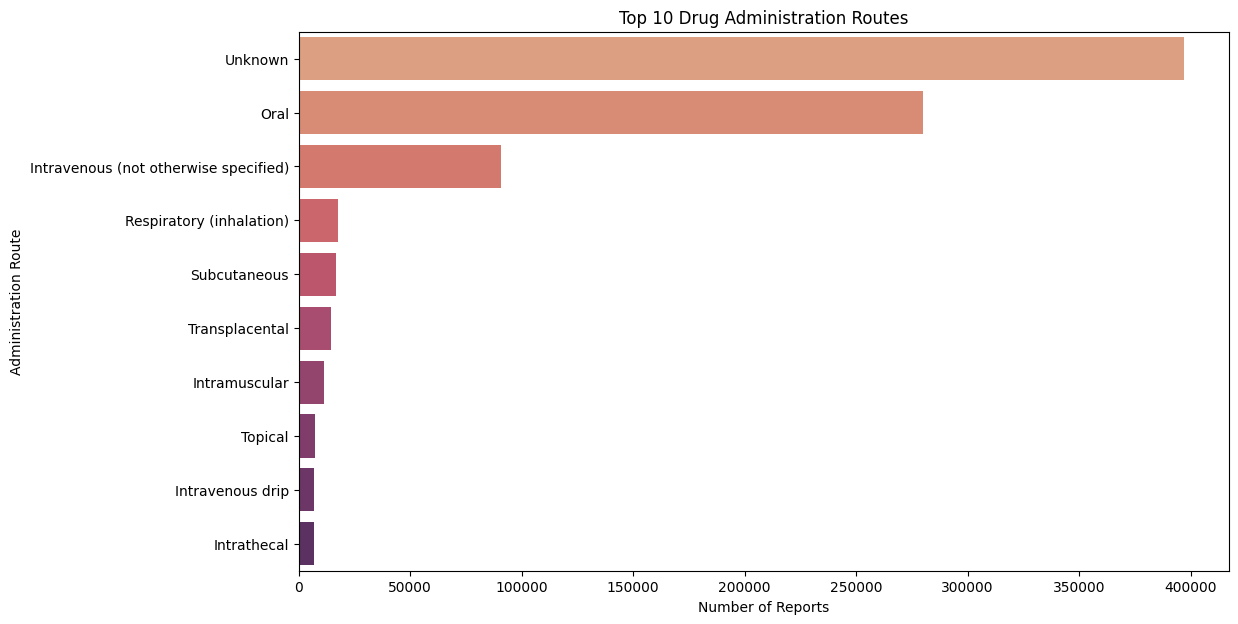

In [20]:
# --- วิธีการให้ยา (Drug Administration Route) ---
top_routes = ped_data['drug_administration'].value_counts().nlargest(10)
plt.figure(figsize=(12, 7))
sns.barplot(y=top_routes.index, x=top_routes.values, orient='h', palette='flare')
plt.title('Top 10 Drug Administration Routes')
plt.xlabel('Number of Reports')
plt.ylabel('Administration Route')
plt.show()